In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import gdown
import rarfile
import os

# Correct URL after permissions are updated
url = 'https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw'
output_rar = '/content/WHEAT.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Check if the downloaded file is valid before extracting
if os.path.exists(output_rar):
    try:
        # Try to open the downloaded file as a RAR file
        with rarfile.RarFile(output_rar, 'r') as rar_ref:
            rar_ref.extractall('/content')
        print("File extracted successfully!")
    except rarfile.NotRarFile:
        print("Error: The downloaded file is not a valid RAR archive.")
else:
    print("Error: File not found.")

Downloading...
From (original): https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw
From (redirected): https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw&confirm=t&uuid=50203b42-4585-4692-9205-0e8f8242c9d0
To: /content/WHEAT.rar
100%|██████████| 228M/228M [00:02<00:00, 81.3MB/s]


File extracted successfully!


In [4]:
# Path to the extracted dataset folder

dataset = '/content/Wheat'

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,911,210 (91.21 MB)

 Trainable params: 23,876,778 (91.08 MB)

 Non-trainable params: 34,432 (134.50 KB)

Found 4204 images belonging to 3 classes.
Found 598 images belonging to 3 classes.
Found 1198 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 159s 587ms/step - accuracy: 0.6410 - loss: 1.1098 - val_accuracy: 0.3344 - val_loss: 1.6252
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.8274 - loss: 0.4370 - val_accuracy: 0.3344 - val_loss: 3.1887
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 33s 249ms/step - accuracy: 0.8672 - loss: 0.3342 - val_accuracy: 0.3545 - val_loss: 2.7499
Epoch 4/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 240ms/step - accuracy: 0.8956 - loss: 0.2715 - val_accuracy: 0.6472 - val_loss: 0.9508
Epoch 5/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 244ms/step - accuracy: 0.9002 - loss: 0.2524 - val_accuracy: 0.8829 - val_loss: 0.2958
Epoch 6/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.9014 - loss: 0.2500 - val_accuracy: 0.9047 - val_loss: 0.2212
Epoch 7/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 242ms/step - accuracy: 0.9146 - loss: 0.2282 - val_accuracy: 0.9097 - val_loss: 0.2368
Epoch 8/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 32s 243ms/step - accuracy: 0.9136 - loss: 

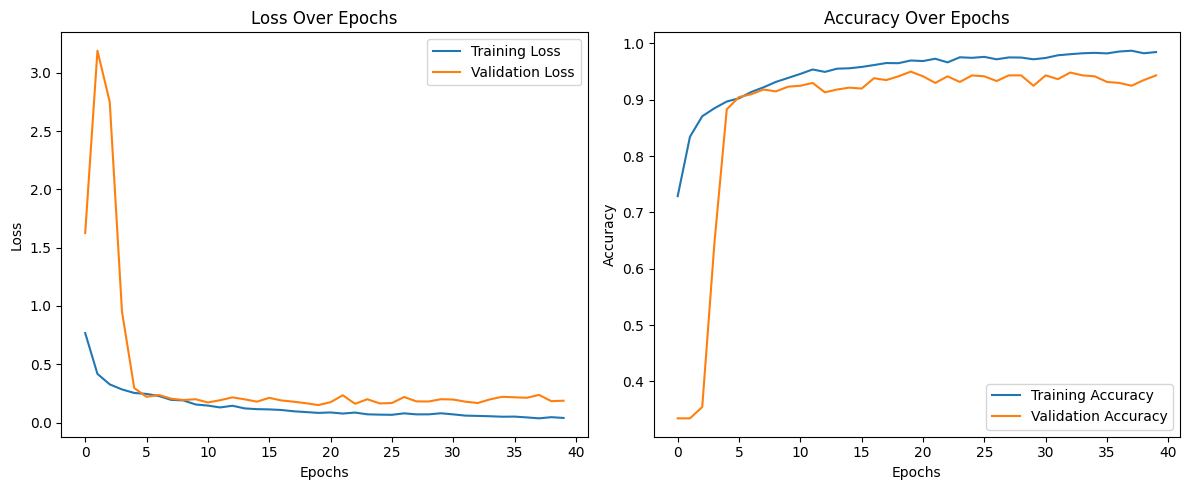

38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 300ms/step

Performance on Test Data
Precision: 0.9330710214059932
Recall: 0.9323873121869783
F1 Score: 0.9324170486517481
Accuracy: 0.9323873121869783
Confusion Matrix:
              Brown_Rust  Healthy  Yellow_Rust
Brown_Rust          361        9           30
Healthy               6      380           12
Yellow_Rust          15        9          376


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Directory for the dataset
data_dir = dataset  # Replace with your dataset path

# Load InceptionV3 without pre-trained weights, including all layers for training
base_model = InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3))

# Ensure all layers are trainable
base_model.trainable = True

# Add custom layers on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)  # Adjust the number of classes as needed

# Create the model
model = Model(inputs, outputs)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001),  # Smaller learning rate for training from scratch
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)  # Increase epochs for training from scratch

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Brown_Rust', 'Healthy', 'Yellow_Rust'], title="Performance on Test Data")
